# Exploring vehicles listings data from Craigslist.org

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Introduction
In this Notebook, we will perform a basic analysis of vehicles listings data from Craigslist.org.
<br/>
We will be performing the following rudimentary exercises:
1. Load the dataset
2. Cleaning the data
3. Univariate analysis
4. Multivariate analysis

Data was made public by Austin Reese and can be found via: https://www.kaggle.com/austinreese/craigslist-carstrucks-data
<br/>
Let's load our dataset

In [2]:
# Load the dataset
df_train = pd.read_csv(r'C:\Users\leejak\Desktop\Projects\used cars data exploration\data\craigslistVehiclesdata.csv\craigslistVehiclesdata.csv')

In [3]:
# View basic data information
df_train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545937 entries, 0 to 545936
Data columns (total 22 columns):
url             545937 non-null object
city            545937 non-null object
city_url        545937 non-null object
price           545937 non-null int64
year            544579 non-null float64
manufacturer    518878 non-null object
make            535870 non-null object
condition       299781 non-null object
cylinders       327970 non-null object
fuel            541328 non-null object
odometer        435921 non-null float64
title_status    542318 non-null object
transmission    541232 non-null object
VIN             309201 non-null object
drive           381508 non-null object
size            183107 non-null object
type            389097 non-null object
paint_color     365761 non-null object
image_url       545891 non-null object
desc            545887 non-null object
lat             538497 non-null float64
long            538497 non-null float64
dtypes: float64(4), int64(1)

In [4]:
df_train.head()

,url,city,city_url,price,year,manufacturer,make,condition,cylinders,fuel,...,transmission,VIN,drive,size,type,paint_color,image_url,desc,lat,long
0,https://abilene.craigslist.org/cto/d/abilene-2...,"abilene, TX",https://abilene.craigslist.org,3500,2006.000,chevrolet,NaN,excellent,6 cylinders,gas,...,automatic,NaN,NaN,NaN,NaN,white,https://images.craigslist.org/00e0e_iduGuXQ3P0...,"2006 Chevy Equinox with only 113,000 miles. V6...",32.402,-99.885
1,https://abilene.craigslist.org/cto/d/austin-20...,"abilene, TX",https://abilene.craigslist.org,3399,2002.000,lexus,es300,good,6 cylinders,gas,...,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00000_fJJiWIlx3z...,Nice and very reliable luxury family sedan. A...,30.120,-97.743
2,https://abilene.craigslist.org/cto/d/aspermont...,"abilene, TX",https://abilene.craigslist.org,9000,2009.000,chevrolet,suburban lt2,good,8 cylinders,gas,...,automatic,1GFNC26099R211276,rwd,full-size,SUV,white,https://images.craigslist.org/00909_5P6f1E6zHl...,2WD 1/2 ton\nLeather Captains Chairs\nIn good ...,33.130,-100.234
3,https://abilene.craigslist.org/ctd/d/liberty-h...,"abilene, TX",https://abilene.craigslist.org,31999,2012.000,ram,2500,NaN,NaN,diesel,...,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00u0u_24XW8uhLYP...,www.GETADIESEL.com\n2012 RAM 2500 SLT 4X4 MEGA...,30.648,-97.863
4,https://abilene.craigslist.org/ctd/d/liberty-h...,"abilene, TX",https://abilene.craigslist.org,16990,2003.000,ram,3500,NaN,NaN,diesel,...,manual,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00l0l_H1UKTJ4sTI...,www.GETADIESEL.com\n2003 DODGE RAM 3500 LARAMI...,30.649,-97.862


## 1. Cleaning the data

### 1.1 Missing Data

First, let's deal with missing data. We should take into consideration the following questions when dealing with missing data:
1. How prevalent is missing data?
2. Is data missing randomly or is there a pattern? (ex: are cheaper vehicles more likely to have missing `condition`?) <br />

We don't want to simply exclude all records with missing data - we want to be mindful of the trade-off between improving data quality vs reducing sample size. Also, we want to ensure our process of treating missing data is not biased and doesn't overlook an uncovered truth. Let's create a table showing the count and % of missing values for each variable:

In [5]:
# Determine count and % of missing data for each variable
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum() / df_train.isnull().count() * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['total number of mising data', '%'])
missing_data

,total number of mising data,%
size,362830,66.460
condition,246156,45.089
VIN,236736,43.363
cylinders,217967,39.925
paint_color,180176,33.003
drive,164429,30.119
type,156840,28.729
odometer,110016,20.152
manufacturer,27059,4.956
make,10067,1.844


-> Let's analyze the table above to determine how to deal with each column with missing data.<br />

Let's say that a variable with more than 15% as missing data should be considered for exlusion from our dataset.
Keeping this in mind, I will exclude the following variables from our dataset:
- `size`, `VIN`, `cylinders`, `paint_color`

Although the following variables have more than 15% as missing data, I'll follow my intuition and not exclude them because I believe it possesses strong predictive power for `price`:
- `condition`, `drive`, `type`, `odometer`

In [6]:
# Exclude variables from dataset
df_train.drop(columns=['size', 'VIN', 'cylinders', 'paint_color'], inplace=True)

In [7]:
# Fill in missing data for the remaining variables and update data type accordingly
df_train['condition'].fillna('na', inplace=True)
df_train['drive'].fillna('na', inplace=True)
df_train['type'].fillna('na', inplace=True)
df_train['odometer'].fillna(-1, inplace=True)
df_train['manufacturer'].fillna('na', inplace=True)
df_train['make'].fillna('na', inplace=True)
df_train['transmission'].fillna('na', inplace=True)
df_train['fuel'].fillna('na', inplace=True)
df_train['year'].fillna(1, inplace=True)
df_train['year'] = df_train['year'].astype(int)

### 1.2 Outliers

There doesn't exist a 'true' outlier. Here, let's simply standardize `price` and show the resulting 10 lowest and highest data points that could be considered as outliers.

In [8]:
# standardize 'price'
price_stnd = StandardScaler().fit_transform(df_train['price'][:,np.newaxis]);
lowest_outliers = price_stnd[price_stnd[:,0].argsort()][:10]
highest_outliers = price_stnd[price_stnd[:,0].argsort()][-10:]
print('top 10 possible lowest outliers:')
print(lowest_outliers)
print('\ntop 10 possible highest outliers:')
print(highest_outliers)

top 10 possible lowest outliers:
[[-0.00565923]
 [-0.00565923]
 [-0.00565923]
 [-0.00565923]
 [-0.00565923]
 [-0.00565923]
 [-0.00565923]
 [-0.00565923]
 [-0.00565923]
 [-0.00565923]]

top 10 possible highest outliers:
[[ 78.70902362]
 [ 99.88790696]
 [178.60258989]
 [211.78317473]
 [211.78317473]
 [217.59890271]
 [252.73369536]
 [304.26221577]
 [304.26272585]
 [304.26338256]]


For now, I will not treat these data points as outliers. However, I will be mindful of the presence of the top 8 possible highest outliers going forward.

## 2. Univariate analysis

Let's take a deeper look into our response variable, `price`. 

In [9]:
# Descriptive statistics summary of 'price'
df_train['price'].describe()

count       545937.000
mean         79883.907
std       14115690.851
min              0.000
25%           3800.000
50%           8985.000
75%          17499.000
max     4294963796.000
Name: price, dtype: float64

-> The minimum of 0 and maximum of 4,294,963,796.000 is questionable. I doubt there are vehicles being offered for free nor there are people selling spaceships. We will take this into consideration when we explore outliers later in this notebook. For now, let's continue.

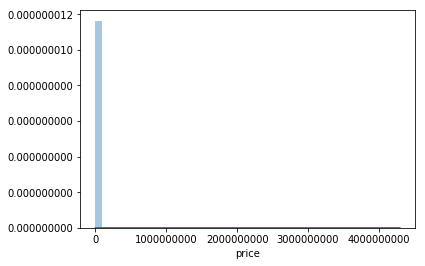

In [10]:
# Plot a histogram of 'price'
sns.distplot(df_train['price'])
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y');

-> The histogram is heavily skewed to the right. Thus, lets plot a histogram for prices in range (0, q_99] where q_99 is the 99th percentile of `price`.

In [11]:
# Find 90th percentile of 'price'
q_99 = df_train['price'].quantile(0.99)
print(q_99)

51000.0


In [12]:
# Create subset of the original dataset for vehicles with prices in range (0, 51000.0]
df_train_q99 = df_train[(df_train['price']>0) & (df_train['price']<=q_99)]
print(df_train_q99.shape)

(494070, 18)


-> We see that out of the 545,937 vehicles in the original dataset, there are 494,070 vehicles with prices in range (0, 51000.0] - that's about 90.5%. We can feel 'safe' about subseting the original dataset and yet preserving as much data as possible.

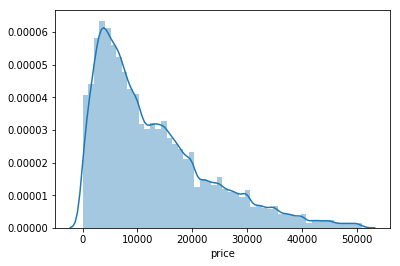

In [13]:
# Plot a histogram of 'price' for vehicles with prices in range (0, 51000.0]
sns.distplot(df_train_q99['price'])
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y');

-> That looks better on our eyes.
<br/>
Let's take a look at skewness and kurtosis

In [14]:
# Show skewness and kurtosis
print("Skewness: %f" % df_train_q99['price'].skew())
print("Kurtosis: %f" % df_train_q99['price'].kurt())

Skewness: 1.140738
Kurtosis: 0.905983


-> We can make the following observations about `price`:
- **deviates from the Normal Distribution**
- **noticable positive skewness**
- **low peakedness (relatively light-tailed)**

I will use the subsetted data going forward.

## 3. Multivariate analysis

### 3.1 `price` vs categorial variables

#### 3.1.1 `price` vs `year`

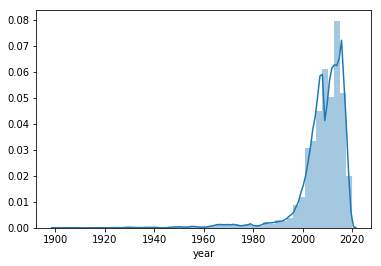

In [15]:
# Plot a histogram of 'year'
sns.distplot(df_train_q99[df_train_q99['year']!=1]['year']);

-> most vehicles are made in the year 2000 and later.

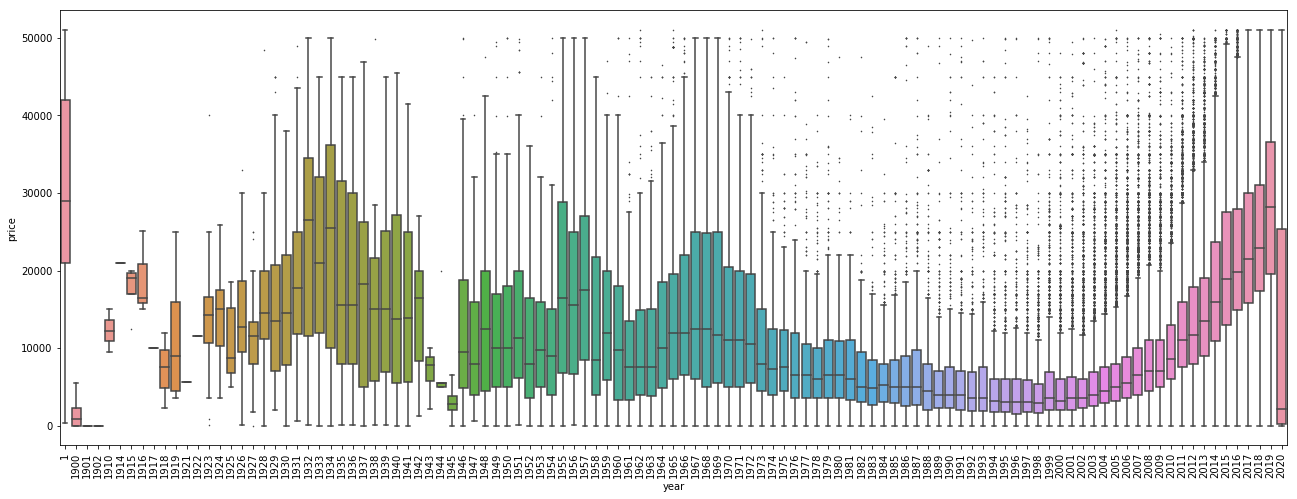

In [16]:
# Plot box-plot showing 'price' vs 'year'
data = pd.concat([df_train_q99['price'], df_train_q99['year']], axis=1).sort_values(by=['year'])
f, ax = plt.subplots(figsize=(22, 8))
fig = sns.boxplot(x='year', 
                  y="price", 
                  data=data,
                  fliersize=0.7)
plt.xticks(rotation=90);

-> There is a noticable increase in `price` from 2000 to present. Volatile trends for other years is most likely due to the lack of data. We can make the following observation: **the newer the vehicle, the higher the price**.

#### 3.1.2 `price` vs `manufacturer`

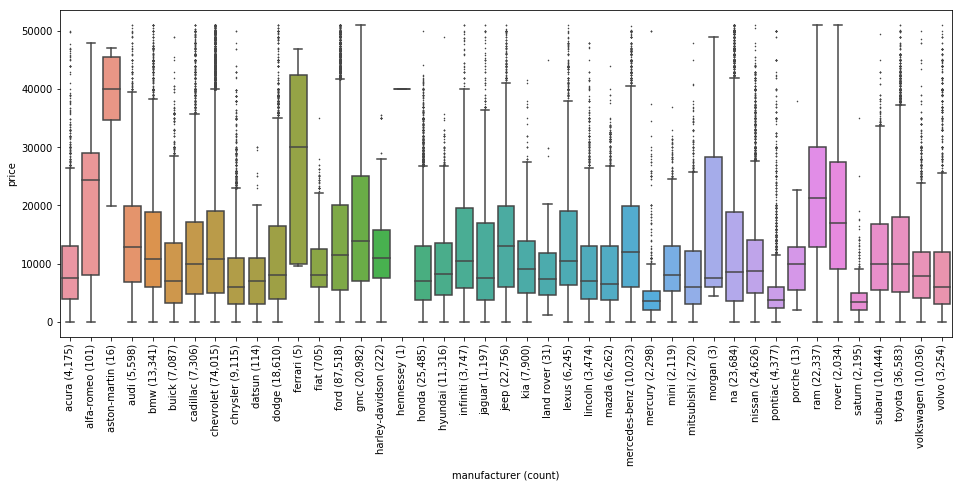

In [17]:
# Plot box-plot showing 'price' vs 'manufacturer'
data = pd.concat([df_train_q99['price'], df_train_q99['manufacturer']], axis=1).sort_values(by=['manufacturer'])
f, ax = plt.subplots(figsize=(16, 6))
fig = sns.boxplot(x='manufacturer', 
                  y="price", 
                  data=data,
                  fliersize=0.7)
# Some formatting work to include count alongside manufacturer name in x-axis label
count_by = df_train_q99.groupby('manufacturer').size().reset_index()
count_by['manufacturer (count)'] = (count_by['manufacturer']
                                    + ' (' + count_by[0].map('{:,}'.format) + ')')
x_labels = count_by['manufacturer (count)'].tolist()
ax.set(xlabel='manufacturer (count)', xticklabels=x_labels)
plt.xticks(rotation=90);

-> Generally, we observe that vehicles from higher-end manufacturers such as Audi, BMW, Lexus, Benz, Range Rover, etc are listed at higher prices than lower-end manufacturers such as Chrysler, Honda, Mazda, etc. However, I don't feel comfortable concluding that the more luxury the brand, the higher the price. **I believe `manufacturer` could be correlated with other variables and require a more in-depth correlation analysis** (ex: there may be more Audi vehicles made in recent years than in older years).

#### 3.1.3 `price` vs `condition`

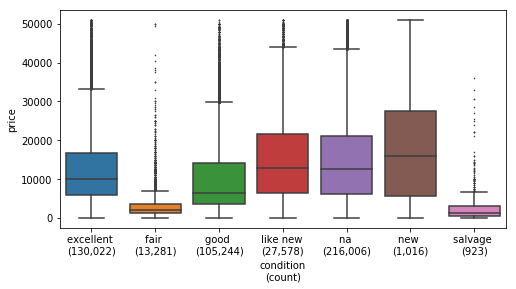

In [18]:
# Plot box-plot showing 'price' vs 'condition'
data = pd.concat([df_train_q99['price'], df_train_q99['condition']], axis=1).sort_values(by=['condition'])
f, ax = plt.subplots(figsize=(8, 4))
fig = sns.boxplot(x='condition', 
                  y="price", 
                  data=data,
                  fliersize=0.7)
# Some formatting work to include count alongside manufacturer name in x-axis label
count_by = df_train_q99.groupby('condition').size().reset_index()
count_by['condition (count)'] = (count_by['condition'] 
                                 + ' \n(' + count_by[0].map('{:,}'.format) + ')')
x_labels = count_by['condition (count)'].tolist()
ax.set(xlabel='condition\n(count)', xticklabels=x_labels);

-> The data supports our intuition that the **better the condition, the higher the price** (new > like new > excellent > good > fair > salvage).

#### 3.1.4 `price` vs `city`

Let's take a look at what kind of values exists in `city`:

In [19]:
# Show number of unique values in 'city'
print(df_train_q99['city'].nunique())

413


In [20]:
# Show some unique values in 'city'
df_train_q99['city'].unique()[:20]

array(['abilene, TX', 'akron / canton', 'albany, GA', 'albany, NY',
       'albuquerque', 'altoona-johnstown', 'amarillo, TX', 'ames, IA',
       'anchorage / mat-su', 'annapolis, MD', 'ann arbor, MI',
       'appleton-oshkosh-FDL', 'asheville, NC', 'ashtabula, OH',
       'athens, GA', 'athens, OH', 'atlanta, GA', 'auburn, AL',
       'augusta, GA', 'austin, TX'], dtype=object)

-> We see that there are too many (413) unique values in city. We see that some values in 'city' also contain the state code after a comma. Let's extract the state code (if available) and create a 'state' column. 

In [21]:
# Create 'state' column by extracting state code from 'city'; fill with 'other' if state code doesn't exist
df_train_q99['state'] = df_train_q99['city'].str.split(",").str[1]
df_train_q99['state'].fillna('other', inplace=True)

In [22]:
# Show number of unique values in 'state'
df_train_q99['state'].nunique()

44

-> We have successfully downsized the number of unique values from 413 to 44. For our multivariate analysis purposes, this will allow us to produce a simpler visualization of the relationship between price and the geographical location of the vehicle being sold.

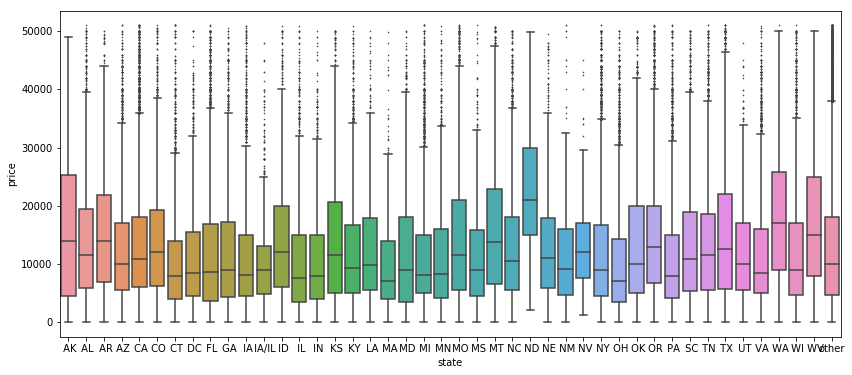

In [23]:
# Plot box-plot showing 'price' vs 'state'
data = pd.concat([df_train_q99['price'], df_train_q99['state']], axis=1).sort_values(by=['state'])
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x='state', 
                  y="price", 
                  data=data,
                  fliersize=0.7)

-> Vehicle prices in North Dakota (ND) seem to be higher than the rest of the states. However, I believe there is not information to make an appreciable observation.

### 3.2 `price` vs continuous variables

#### 3.2.1 `price` vs `odometer`

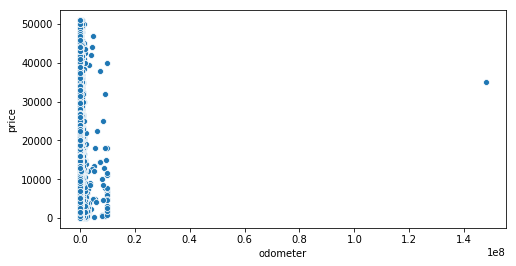

In [24]:
# Plot scatter plot showing 'price' vs 'odometer'
f, ax = plt.subplots(figsize=(8, 4))
data = pd.concat([df_train_q99['price'], df_train_q99['odometer']], axis=1)
ax = sns.scatterplot(x="odometer", y="price", data=data);

-> We observe an obvious outlier. Let's filter our dataset to only include data with `odometer` less than the 99th percentile.

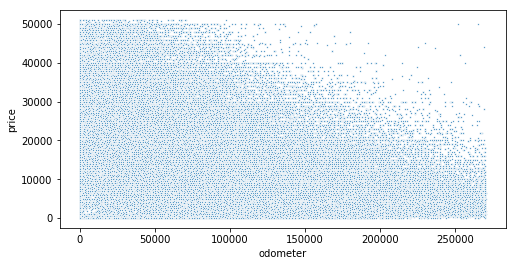

In [25]:
# Plot scatter plot showing 'price' vs 'odometer' ('odometer' less than 99th percentile)
data = df_train_q99[df_train_q99['odometer']<=df_train_q99['odometer'].quantile(0.99)]
data = pd.concat([data['price'], data['odometer']], axis=1)
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.scatterplot(x="odometer", y="price", data=data, s=3)

-> It is difficult to deduce from the scatter plot a linear relationship. **The data doesn't strongly support my intuition that the more miles/km driven, the cheaper the vehicle**.